https://bit.ly/FEML-4-metrics

## Метрики

### Модели разной сложности совершают разные ошибки обучения и ошибки обобщения

Данные содержат признаки пользователей и целевую переменную affair - была ли связь на стороне

In [ ]:
!wget 'https://drive.google.com/uc?id=1H1d_wOrwtBmlH9KYPmvTVWROF70JuCvF' -O affair_data.csv

--2022-11-11 06:53:27--  https://drive.google.com/uc?id=1H1d_wOrwtBmlH9KYPmvTVWROF70JuCvF
Resolving drive.google.com (drive.google.com)... 142.251.6.138, 142.251.6.101, 142.251.6.139, ...
Connecting to drive.google.com (drive.google.com)|142.251.6.138|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://doc-10-84-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/2vopatqq4vvmk9a1kbhuh6e02mu178k7/1668149550000/02611596255248067438/*/1H1d_wOrwtBmlH9KYPmvTVWROF70JuCvF?uuid=39d2816c-a0b1-494d-a494-ffcde3a46a1e [following]
--2022-11-11 06:53:27--  https://doc-10-84-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/2vopatqq4vvmk9a1kbhuh6e02mu178k7/1668149550000/02611596255248067438/*/1H1d_wOrwtBmlH9KYPmvTVWROF70JuCvF?uuid=39d2816c-a0b1-494d-a494-ffcde3a46a1e
Resolving doc-10-84-docs.googleusercontent.com (doc-10-84-docs.googleusercontent.com)... 74.125.201.132, 2607:f8b0:4001:c01::84
Connecting to doc-10-84-

In [ ]:
import pandas as pd

data = pd.read_csv('affair_data.csv')
data.head()

,rate_marriage,age,yrs_married,children,religious,educ,occupation,occupation_husb,affairs
0,3.0,32.0,9.0,3.0,3.0,17.0,2.0,5.0,1
1,3.0,27.0,13.0,3.0,1.0,14.0,3.0,4.0,1
2,4.0,22.0,2.5,0.0,1.0,16.0,3.0,5.0,1
3,4.0,37.0,16.5,4.0,3.0,16.0,5.0,5.0,1
4,5.0,27.0,9.0,1.0,1.0,14.0,3.0,4.0,1


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6366 entries, 0 to 6365
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   rate_marriage    6366 non-null   float64
 1   age              6366 non-null   float64
 2   yrs_married      6366 non-null   float64
 3   children         6366 non-null   float64
 4   religious        6366 non-null   float64
 5   educ             6366 non-null   float64
 6   occupation       6366 non-null   float64
 7   occupation_husb  6366 non-null   float64
 8   affairs          6366 non-null   int64  
dtypes: float64(8), int64(1)
memory usage: 447.7 KB


In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

Формируем набор признаков и целевую переменную

In [ ]:
X = data[data.columns[:-1]]
X.head(2)

,rate_marriage,age,yrs_married,children,religious,educ,occupation,occupation_husb
0,3.0,32.0,9.0,3.0,3.0,17.0,2.0,5.0
1,3.0,27.0,13.0,3.0,1.0,14.0,3.0,4.0


In [ ]:
Y = data['affairs']

In [ ]:
model = LogisticRegression()
model_tree = DecisionTreeClassifier()

Разбиваем данные на обучающую и тестовую выборки в соотношении 70 / 30

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=0)

Обучаем модель

In [ ]:
model.fit(X_train, Y_train)

LogisticRegression()

In [ ]:
model_tree.fit(X_train, Y_train)

DecisionTreeClassifier()

Получаем прогнозные значения модели (переменная predictions)

In [ ]:
predictions = model.predict_proba(X_test)

In [ ]:
predictions[:2]

array([[0.37442486, 0.62557514],
       [0.92523133, 0.07476867]])

In [ ]:
model.score(X_train, Y_train)

0.7235188509874326

In [ ]:
model.score(X_test, Y_test)

0.7319371727748691

In [ ]:
model_tree.score(X_train, Y_train)

0.9497307001795332

In [ ]:
model_tree.score(X_test, Y_test)

0.6523560209424084

### Оценка качества модели

Считаем accuracy последней модели

In [ ]:
tp = 0 # True positive
fp = 0 # False positive
fn = 0 # False negative
tn = 0 # True negative

predictions = model.predict_proba( X_test )
for predicted_prob, actual in zip( predictions[:, 1], Y_test ):    
    if predicted_prob >= 0.5:
        predicted = 1
    else:
        predicted = 0
    
    if predicted == 1:
        if actual == 1:
            tp += 1
        else:
            fp += 1
    
    else:
        if actual == 1:
            fn += 1
        else:
            tn += 1

In [ ]:
pred = model.predict(X_test)

In [ ]:
tp, fp, fn, tn

(226, 131, 381, 1172)

In [ ]:
# какая точность получилась?
(tp + tn) / (tp + fp + fn + tn)

0.7319371727748691

In [ ]:
precision = tp / (tp + fp)
precision

0.6330532212885154

In [ ]:
recall = tp / (tp + fn)
recall

0.3723228995057661

In [ ]:
from sklearn.metrics import recall_score, precision_score

In [ ]:
recall_score(Y_test, pred)

0.3723228995057661

In [ ]:
precision_score(Y_test, pred)

0.6330532212885154

### ROC

In [ ]:
# посчитаем ROC-кривую (Receiver Operating Characteristic)
from sklearn.metrics import roc_curve

In [ ]:
# получаем значения false и true positive rate для различных значений порога
fpr, tpr, thres = roc_curve(Y_test, predictions[:, 1])

In [ ]:
for line in zip(fpr[:10], tpr[:10], thres[:10]):
    print(line)

(0.0, 0.0, 1.9292091223891046)
(0.0, 0.0016474464579901153, 0.9292091223891046)
(0.0, 0.008237232289950576, 0.8999886296793331)
(0.0007674597083653108, 0.008237232289950576, 0.8977304739459553)
(0.0007674597083653108, 0.019769357495881382, 0.8650840076140701)
(0.0030698388334612432, 0.019769357495881382, 0.85471299581309)
(0.0030698388334612432, 0.023064250411861616, 0.8544826989864462)
(0.003837298541826554, 0.023064250411861616, 0.8521926971764641)
(0.003837298541826554, 0.03130148270181219, 0.8338303364782959)
(0.004604758250191865, 0.03130148270181219, 0.833607318350775)


In [ ]:
import matplotlib.pyplot as plt

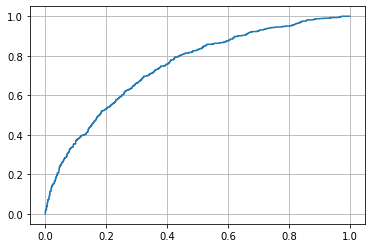

In [ ]:
plt.plot(fpr, tpr)
plt.grid()

**Построим еще одну модель и сравним их между собой**

In [ ]:
Xshort = X.loc[ :, ['age', 'children']]
Xshort.head()

,age,children
0,32.0,3.0
1,27.0,3.0
2,22.0,0.0
3,37.0,4.0
4,27.0,1.0


In [ ]:
model2 = LogisticRegression()

In [ ]:
X_train_short, X_test_short, Y_train, Y_test = train_test_split(Xshort, Y, test_size=0.3, random_state=0)

In [ ]:
model2.fit(X_train_short, Y_train)

LogisticRegression()

In [ ]:
predictions2 = model2.predict_proba(X_test_short)

In [ ]:
fpr2, tpr2, thres2 = roc_curve(Y_test, predictions2[:, 1])

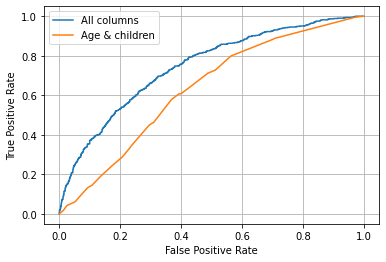

In [ ]:
plt.plot( fpr, tpr, label = 'All columns' )
plt.plot( fpr2, tpr2, label = 'Age & children' )

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

plt.legend(loc=0)
plt.grid()
plt.show()


**Посчитаем площадь под ROC-кривой для двух моделей**

In [ ]:
from sklearn.metrics import roc_curve

In [ ]:
from sklearn.metrics import roc_auc_score

In [ ]:
roc_auc_score( Y_test, predictions[:, 1] )

0.7451629176618145

In [ ]:
roc_auc_score( Y_test, predictions2[:, 1] )

0.6311452091928271

Можно посчитать с помощью более общего метода auc

Про разницу между ними https://stackoverflow.com/questions/31159157/different-result-with-roc-auc-score-and-auc

In [ ]:
from sklearn.metrics import auc

In [ ]:
auc( fpr, tpr )

0.7451629176618145

In [ ]:
auc( fpr2, tpr2 )

0.6311452091928271

### Используем готовые библиотеки

In [ ]:
# метод для построения графика precision-recall
from sklearn.metrics import precision_recall_curve

In [ ]:
pr, re, thres = precision_recall_curve( Y_test, predictions[:, 1] )

In [ ]:
pr.shape, thres.shape

((1669,), (1668,))

In [ ]:
# посмотрим что получилось
for line in zip(pr[:10], re[:10], thres[:10]):
    print(line)

(0.32338838572189665, 1.0, 0.07582923251103321)
(0.3230277185501066, 0.9983525535420099, 0.07617596157571913)
(0.3232, 0.9983525535420099, 0.07800501586816877)
(0.3233724653148346, 0.9983525535420099, 0.07833731223692608)
(0.32354511478910836, 0.9983525535420099, 0.07858652846139304)
(0.32371794871794873, 0.9983525535420099, 0.07969132533406419)
(0.3238909673971138, 0.9983525535420099, 0.07987106574004733)
(0.3240641711229946, 0.9983525535420099, 0.0803136757027235)
(0.32423756019261635, 0.9983525535420099, 0.08053860905221413)
(0.3238758029978587, 0.9967051070840197, 0.08068797247400258)


(0.0, 1.0)

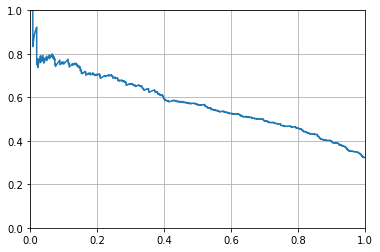

In [ ]:
plt.plot(re, pr)
plt.grid()
plt.xlim(0, 1)
plt.ylim(0, 1)

### Разные разбиения -> разные результаты

Построим набор моделей для значений random_state от 0 до 9. Получите model.score для каждого варианта.

In [ ]:
for i in range(10):
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=i)
    model = LogisticRegression()
    model.fit(X_train, Y_train)
    print("{}: {}".format(i, model.score(X_test, Y_test)))

0: 0.7319371727748691
1: 0.731413612565445
2: 0.7172774869109948
3: 0.7198952879581152
4: 0.7136125654450262
5: 0.7272251308900524
6: 0.7136125654450262
7: 0.7361256544502618
8: 0.7162303664921466
9: 0.7204188481675393


In [ ]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(model, X_train, Y_train, cv=7)
scores.mean(), scores

(0.7273315504928904,
 array([0.72684458, 0.711146  , 0.74568289, 0.73626374, 0.70754717,
        0.72484277, 0.73899371]))

In [ ]:
from sklearn.model_selection import KFold
kf = KFold(n_splits=9)

scores = cross_val_score(model, X_train, Y_train, cv=kf)

scores.mean(), scores

(0.7248642337352015,
 array([0.72983871, 0.72121212, 0.71313131, 0.73535354, 0.72929293,
        0.72525253, 0.71111111, 0.72929293, 0.72929293]))

In [ ]:
from sklearn.model_selection import StratifiedKFold
skf = StratifiedKFold(n_splits=9)

scores = cross_val_score(model, X_train, Y_train, cv=skf)

scores.mean(), scores

(0.7244157525071504,
 array([0.72782258, 0.74343434, 0.68686869, 0.75151515, 0.72525253,
        0.70707071, 0.71111111, 0.74141414, 0.72525253]))

### Пример влияния L1 и L2-регуляризации

In [ ]:
model1 = LogisticRegression(penalty='l1',
                            C=0.01,
                            solver='liblinear').fit(X_train, Y_train)
predictions = model1.predict_proba(X_test)

In [ ]:
model2 = LogisticRegression(penalty='l2',
                            C=0.1,
                            solver='liblinear').fit(X_train, Y_train)
predictions2 = model2.predict_proba(X_test)

In [ ]:
model3 = LogisticRegression(penalty='l2',
                            C=1, 
                            solver='liblinear').fit(X_train, Y_train)
predictions3 = model3.predict_proba(X_test)

In [ ]:
fpr, tpr, thres = roc_curve(Y_test, predictions[:, 1])
fpr2, tpr2, thres2 = roc_curve(Y_test, predictions2[:, 1])
fpr3, tpr3, thres3 = roc_curve(Y_test, predictions3[:, 1])

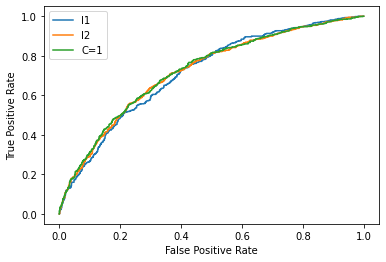

In [ ]:
plt.plot(fpr, tpr, label='l1')
plt.plot(fpr2, tpr2, label='l2')
plt.plot(fpr3, tpr3, label='C=1')

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

plt.legend(loc=0)
plt.show()

**Построим еще одну модель, используя другие признаки**

In [ ]:
Xshort = pd.get_dummies( data.loc[ :, ['age', 'children'] ], columns = ['age', 'children'] )
Xshort.head()

,age_17.5,age_22.0,age_27.0,age_32.0,age_37.0,age_42.0,children_0.0,children_1.0,children_2.0,children_3.0,children_4.0,children_5.5
0,0,0,0,1,0,0,0,0,0,1,0,0
1,0,0,1,0,0,0,0,0,0,1,0,0
2,0,1,0,0,0,0,1,0,0,0,0,0
3,0,0,0,0,1,0,0,0,0,0,1,0
4,0,0,1,0,0,0,0,1,0,0,0,0


In [ ]:
Y = data['affair']

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split( Xshort, Y, test_size = 0.3, random_state = 0 )

In [ ]:
model1 = LogisticRegression( penalty = 'l1', C = 0.01, solver='liblinear' ).fit( X_train, Y_train )
model2 = LogisticRegression( penalty = 'l2', C = 0.1, solver='liblinear' ).fit( X_train, Y_train )
model3 = LogisticRegression( penalty = 'l2', C = 1, solver='liblinear' ).fit( X_train, Y_train )

In [ ]:
predictions = model1.predict_proba( X_test )
predictions2 = model2.predict_proba( X_test )
predictions3 = model3.predict_proba( X_test )

In [ ]:
fpr, tpr, thres = roc_curve( Y_test, predictions[:, 1] )
fpr2, tpr2, thres2 = roc_curve( Y_test, predictions2[:, 1] )
fpr3, tpr3, thres3 = roc_curve( Y_test, predictions3[:, 1] )

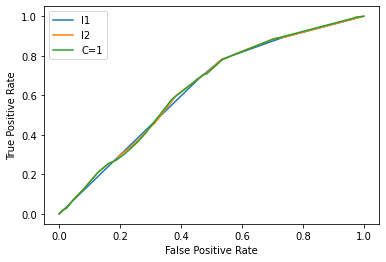

In [ ]:
plt.plot( fpr, tpr, label = 'l1' )
plt.plot( fpr2, tpr2, label = 'l2' )
plt.plot( fpr3, tpr3, label = 'C=1' )

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

plt.legend( loc = 0 )
plt.show()

## Еще пример регуляризации

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split

import warnings
warnings.filterwarnings('ignore')

In [ ]:
def f(x):
  return x - 0.15*x**2+0.01*x**3 - 0.001*x**4+0.0001*x**5

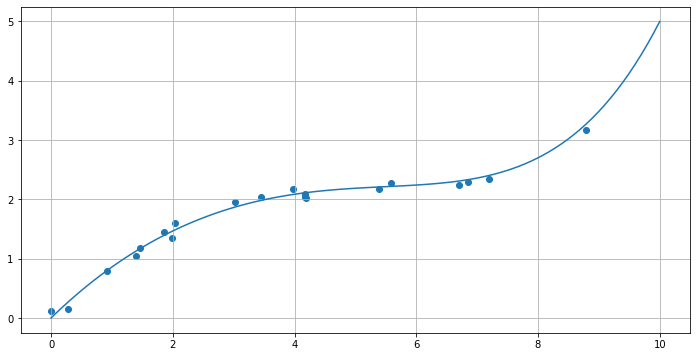

In [ ]:
true_x = np.linspace(0,10,100)
true_y = f(true_x)
true_x = true_x.reshape(-1,1)


np.random.seed(1)
x = np.sort(np.random.uniform(0, 10, 20))
y = f(x) + 0.1*np.random.randn(20)
x = x.reshape(-1,1)


plt.figure(figsize=(12,6))
plt.scatter(x, y)
plt.plot(true_x, true_y)
plt.grid()

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.15, random_state=42)

In [ ]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

pipe = make_pipeline(PolynomialFeatures(11, include_bias=False), 
                     StandardScaler())

pipe.fit(x_train)

Pipeline(steps=[('polynomialfeatures',
                 PolynomialFeatures(degree=11, include_bias=False)),
                ('standardscaler', StandardScaler())])

In [ ]:
X_train = pipe.transform(x_train)
X_test = pipe.transform(x_test)

In [ ]:
X_train.shape

(17, 11)

In [ ]:
lg_r, lg_l, pred_r, pred_l = [], [], [], []
list_r = list(1.5**np.linspace(-10, 2, 10))
list_l = list(2**np.linspace(-10, 2, 10))

In [ ]:
list_r

[0.017341529915832612,
 0.02977664442347742,
 0.051128623450501245,
 0.0877914951989026,
 0.15074426239385438,
 0.25883865621816254,
 0.4444444444444444,
 0.7631428283688876,
 1.310370697104448,
 2.25]

In [ ]:
for i in range(len(list_r)):
  m_r = Ridge(alpha=list_r[i]).fit(X_train, y_train)
  m_l = Lasso(alpha=list_l[i]).fit(X_train, y_train)
  lg_r.append(m_r)
  pred_r.append(m_r.coef_)
  lg_l.append(m_l)
  pred_l.append(m_l.coef_)

lg_r.append(LinearRegression().fit(X_train, y_train))
lg_l.append(LinearRegression().fit(X_train, y_train))

In [ ]:
lg_r

[Ridge(alpha=0.017341529915832612),
 Ridge(alpha=0.02977664442347742),
 Ridge(alpha=0.051128623450501245),
 Ridge(alpha=0.0877914951989026),
 Ridge(alpha=0.15074426239385438),
 Ridge(alpha=0.25883865621816254),
 Ridge(alpha=0.4444444444444444),
 Ridge(alpha=0.7631428283688876),
 Ridge(alpha=1.310370697104448),
 Ridge(alpha=2.25),
 LinearRegression()]

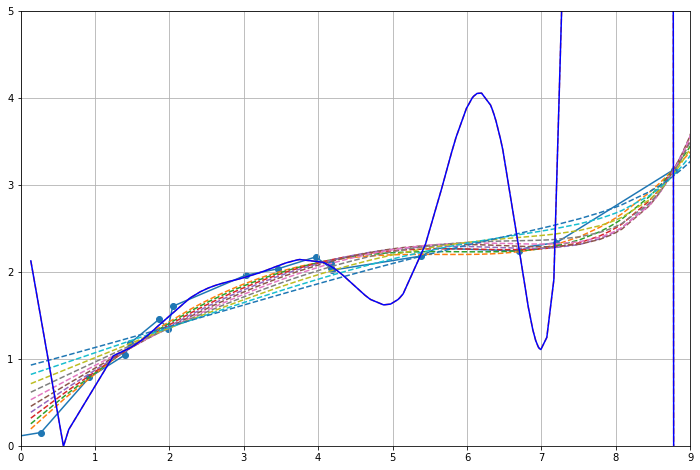

In [ ]:
plt.figure(figsize=[12,8])
plt.plot(x, y)
plt.scatter(x_train, y_train)

x_t = np.sort(np.random.uniform(0, 10, 100)).reshape(-1, 1)
X = pipe.transform(x_t)
for i, m in enumerate(lg_r):
    plt.plot(x_t, m.predict(X), '--')

plt.plot(x_t, lg_r[-1].predict(X), 'b-')
plt.xlim(0,9)
plt.ylim(0,5)
plt.grid()

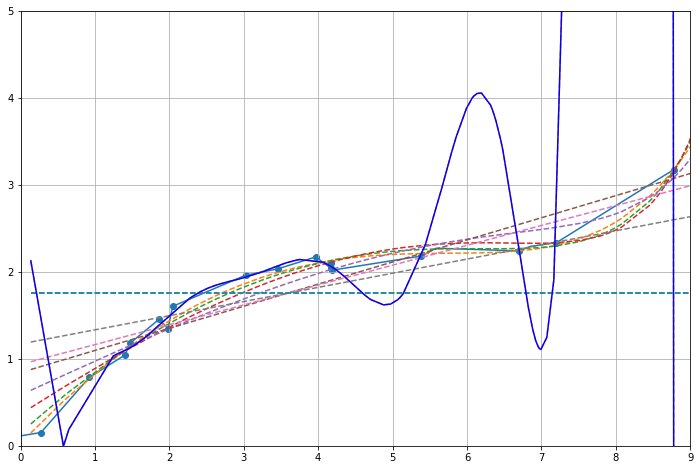

In [ ]:
plt.figure(figsize=[12,8])
plt.plot(x, y)
plt.scatter(x_train, y_train)

for i, m in enumerate(lg_l):
    plt.plot(x_t, m.predict(X), '--')

plt.plot(x_t, lg_l[-1].predict(X), 'b-')
plt.xlim(0,9)
plt.ylim(0,5)
plt.grid()

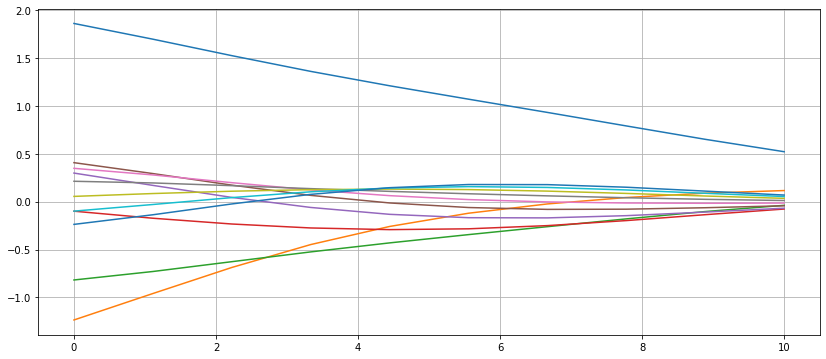

In [ ]:
plt.figure(figsize=[14,6])
x_l = np.linspace(0,len(pred_r),len(pred_r))
for i in np.vstack(pred_r).T:
    plt.plot(x_l,i)
plt.grid()    


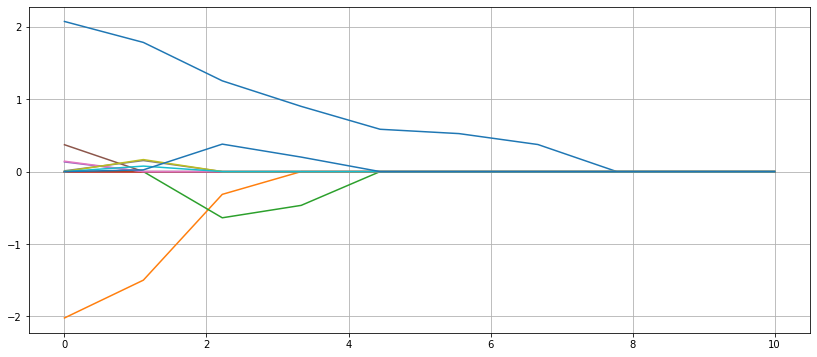

In [ ]:
plt.figure(figsize=[14,6])
x_l = np.linspace(0,len(pred_l),len(pred_l))
for i in np.vstack(pred_l).T:
    plt.plot(x_l,i)
plt.grid()